<a href="https://colab.research.google.com/github/MSZHabibie/NanamYuk-ML/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('accuracy') > 0.9):

      # Stop if threshold is met
      print("\naccuracy is more than 0.8 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [3]:
df = pd.read_csv('/content/drive/My Drive/Product Based Capstone/dataset.csv')
df

,Temperature,Soil,Light,Humid,Rainfall,Label
0,27.13,2,1,56.52,120.57,Bayam Hijau
1,29.30,2,1,50.11,153.08,Bayam Hijau
2,27.84,2,1,55.23,101.82,Bayam Hijau
3,27.08,2,1,57.80,124.50,Bayam Hijau
4,25.51,2,1,50.48,160.80,Bayam Hijau
...,...,...,...,...,...,...
5995,35.03,2,1,57.95,106.46,Melati
5996,32.30,3,1,77.48,111.64,Melati
5997,27.53,2,1,61.81,112.66,Melati
5998,24.42,2,1,51.06,118.05,Melati


In [4]:
X = df.iloc[:,0:5].values
y = df.iloc[:,5].values

In [5]:
print(X[0:5])
print(y[0:5])

[[ 27.13   2.     1.    56.52 120.57]
 [ 29.3    2.     1.    50.11 153.08]
 [ 27.84   2.     1.    55.23 101.82]
 [ 27.08   2.     1.    57.8  124.5 ]
 [ 25.51   2.     1.    50.48 160.8 ]]
['Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau' 'Bayam Hijau']


In [6]:
print(X.shape)
print(y.shape)

(6000, 5)
(6000,)


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

[0 0 0 ... 8 8 8]


In [8]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]


In [9]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=5, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
    # tf.keras.layers.Dense(22, activation='softmax') #Example Using good Dataset
  ])
model

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=100, 
                    validation_data=(X_val, y_val))

Epoch 1/100
72/72 [==============================] - 2s 12ms/step - loss: 3.4666 - accuracy: 0.1447 - val_loss: 2.1389 - val_accuracy: 0.2342
Epoch 2/100
72/72 [==============================] - 1s 8ms/step - loss: 1.9942 - accuracy: 0.3122 - val_loss: 1.9195 - val_accuracy: 0.3067
Epoch 3/100
72/72 [==============================] - 1s 9ms/step - loss: 1.7852 - accuracy: 0.4058 - val_loss: 1.6647 - val_accuracy: 0.4517
Epoch 4/100
72/72 [==============================] - 0s 5ms/step - loss: 1.5719 - accuracy: 0.4753 - val_loss: 1.5122 - val_accuracy: 0.4867
Epoch 5/100
72/72 [==============================] - 0s 6ms/step - loss: 1.3989 - accuracy: 0.4967 - val_loss: 1.3687 - val_accuracy: 0.4908
Epoch 6/100
72/72 [==============================] - 0s 7ms/step - loss: 1.2632 - accuracy: 0.5125 - val_loss: 1.1612 - val_accuracy: 0.5417
Epoch 7/100
72/72 [==============================] - 0s 6ms/step - loss: 1.1403 - accuracy: 0.5514 - val_loss: 1.0829 - val_accuracy: 0.5533
Epoch 8/100


In [13]:
model.save("model.h5")

In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

38/38 - 0s - loss: 0.4539 - accuracy: 0.8442 - 106ms/epoch - 3ms/step
Test loss: 0.4538521468639374
Test accuracy: 0.8441666960716248


In [25]:
new_model = models.load_model("model.h5")
loss, accuracy = new_model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

38/38 - 0s - loss: 0.4539 - accuracy: 0.8442 - 178ms/epoch - 5ms/step
Test loss: 0.4538521468639374
Test accuracy: 0.8441666960716248


Text(0.5, 1.0, 'Training and validation loss')

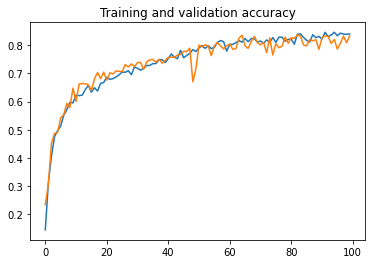

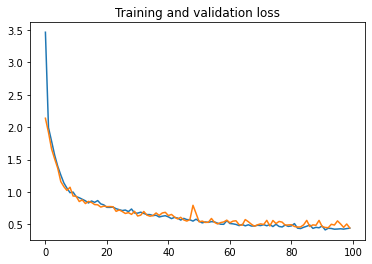

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss')

In [17]:
y_pred = model.predict(X_test)
y_pred

array([[1.63203600e-11, 2.31196536e-05, 9.97938454e-01, ...,
        4.49374634e-28, 6.40351433e-13, 2.02431460e-03],
       [2.82942531e-10, 2.04261796e-05, 9.98358667e-01, ...,
        4.54606634e-27, 1.84212346e-12, 1.61493663e-03],
       [1.08934706e-04, 5.34077780e-03, 1.46176690e-15, ...,
        6.16716210e-18, 3.14215321e-23, 1.97391782e-05],
       ...,
       [6.38508558e-01, 2.41269082e-01, 7.74782222e-07, ...,
        5.15134016e-19, 5.84066902e-06, 6.90797344e-02],
       [2.23134339e-06, 4.79366109e-02, 7.69957991e-13, ...,
        6.18442893e-01, 1.56768481e-20, 9.31791233e-17],
       [1.73410318e-13, 3.16242881e-06, 9.99879837e-01, ...,
        1.28692850e-26, 1.60670952e-14, 1.10406720e-04]], dtype=float32)

In [18]:
actual = np.argmax(y_test,axis=1)
predicted = np.argsort(y_pred,axis=1)
print(f"Actual: {encoder.inverse_transform(actual[:1])}\nPredicted: ")
for top_5 in predicted[:1,7:]:
  top_5 = encoder.inverse_transform(top_5)
  i = 1
  for name in top_5[::-1]:
    print(f"{i}. {name}")
    i += 1

Actual: ['Kubis']
Predicted: 
1. Kubis
2. Tomat
3. Kangkung
4. Lavender
5. Bayam Hijau
